In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    PrecisionRecallDisplay,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [2]:
og_df = pd.read_csv('pokemon.csv')
og_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [3]:
og_df['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [4]:
type_color_dict = {
    'grass': "#78C850",
    'fire': "#FF4422",
    'water': "#3399FF",
    'bug': "#A8B820",
    'normal': "#A8A878",
    'poison': "#A040A0",
    'electric': "#F8D030",
    'ground': "#E0C068",
    'fairy': "#EE99AC",
    'fighting': "#C03028",
    'psychic': "#F85888",
    'rock': "#8A7E46FF",
    'ghost': "#705898",
    'ice': "#98D8D8",
    'dragon': "#7038F8",
    'dark': "#705848",
    'steel': "#B8B8D0",
    'flying': "#A890F0"
}

In [5]:
og_df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [6]:
# Check for non-numeric values in 'capture_rate'
non_numeric_idx = []
for i, val in enumerate(og_df['capture_rate']):
    try:
        float(val)
    except ValueError:
        non_numeric_idx.append(i)
        print(f"Non-numeric value found: \"{val}\" in row {i}")

Non-numeric value found: "30 (Meteorite)255 (Core)" in row 773


In [7]:
# Handle Minior forms
minior_idx = non_numeric_idx[0]

# Create a copy for Minior (Meteorite)
minior_meteorite = og_df.loc[minior_idx].copy()
minior_meteorite['name'] = 'Minior (Meteorite)'
minior_meteorite['capture_rate'] = 30

# Update original to Minior (Core)
og_df.loc[minior_idx, 'name'] = 'Minior (Core)'
og_df.loc[minior_idx, 'capture_rate'] = 255

# Add the new row to the dataframe
og_df = pd.concat([og_df, minior_meteorite.to_frame().T], ignore_index=True)

In [8]:
# Find columns with missing values
cols_with_na = og_df.columns[og_df.isna().any()].tolist()
for attr in cols_with_na:
    print(f"Missing values in column '{attr}':")
    print(og_df[og_df[attr].isna()]['name'].tolist())

Missing values in column 'height_m':
['Rattata', 'Raticate', 'Raichu', 'Sandshrew', 'Sandslash', 'Vulpix', 'Ninetales', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Geodude', 'Graveler', 'Golem', 'Grimer', 'Muk', 'Exeggutor', 'Marowak', 'Hoopa', 'Lycanroc']
Missing values in column 'percentage_male':
['Magnemite', 'Magneton', 'Voltorb', 'Electrode', 'Staryu', 'Starmie', 'Ditto', 'Porygon', 'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew', 'Unown', 'Porygon2', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-Oh', 'Celebi', 'Shedinja', 'Lunatone', 'Solrock', 'Baltoy', 'Claydol', 'Beldum', 'Metang', 'Metagross', 'Regirock', 'Regice', 'Registeel', 'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys', 'Bronzor', 'Bronzong', 'Magnezone', 'Porygon-Z', 'Rotom', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Regigigas', 'Giratina', 'Phione', 'Manaphy', 'Darkrai', 'Shaymin', 'Arceus', 'Victini', 'Klink', 'Klang', 'Klinklang', 'Cryogonal', 'Golett', 'Golurk', 'Cobalion', 'Terrakion', 'Virizion', 'Resh

In [9]:
# Fill height and weight missing values with real values

og_df.loc[og_df['name'] == 'Rattata', 'height_m'] = 0.3
og_df.loc[og_df['name'] == 'Rattata', 'weight_kg'] = 3.5

og_df.loc[og_df['name'] == 'Raticate', 'height_m'] = 0.7
og_df.loc[og_df['name'] == 'Raticate', 'weight_kg'] = 18.5

og_df.loc[og_df['name'] == 'Raichu', 'height_m'] = 0.8
og_df.loc[og_df['name'] == 'Raichu', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Sandshrew', 'height_m'] = 0.6
og_df.loc[og_df['name'] == 'Sandshrew', 'weight_kg'] = 12

og_df.loc[og_df['name'] == 'Sandslash', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Sandslash', 'weight_kg'] = 29.5

og_df.loc[og_df['name'] == 'Vulpix', 'height_m'] = 0.6
og_df.loc[og_df['name'] == 'Vulpix', 'weight_kg'] = 9.9

og_df.loc[og_df['name'] == 'Ninetales', 'height_m'] = 1.1
og_df.loc[og_df['name'] == 'Ninetales', 'weight_kg'] = 19.9

og_df.loc[og_df['name'] == 'Diglett', 'height_m'] = 0.2
og_df.loc[og_df['name'] == 'Diglett', 'weight_kg'] = 0.8

og_df.loc[og_df['name'] == 'Dugtrio', 'height_m'] = 0.7
og_df.loc[og_df['name'] == 'Dugtrio', 'weight_kg'] = 33.3

og_df.loc[og_df['name'] == 'Meowth', 'height_m'] = 0.4
og_df.loc[og_df['name'] == 'Meowth', 'weight_kg'] = 4.2

og_df.loc[og_df['name'] == 'Persian', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Persian', 'weight_kg'] = 32

og_df.loc[og_df['name'] == 'Geodude', 'height_m'] = 0.4
og_df.loc[og_df['name'] == 'Geodude', 'weight_kg'] = 20

og_df.loc[og_df['name'] == 'Graveler', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Graveler', 'weight_kg'] = 105

og_df.loc[og_df['name'] == 'Golem', 'height_m'] = 1.4
og_df.loc[og_df['name'] == 'Golem', 'weight_kg'] = 300

og_df.loc[og_df['name'] == 'Grimer', 'height_m'] = 0.9
og_df.loc[og_df['name'] == 'Grimer', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Muk', 'height_m'] = 1.2
og_df.loc[og_df['name'] == 'Muk', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Exeggutor', 'height_m'] = 2
og_df.loc[og_df['name'] == 'Exeggutor', 'weight_kg'] = 120

og_df.loc[og_df['name'] == 'Marowak', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Marowak', 'weight_kg'] = 45

og_df.loc[og_df['name'] == 'Hoopa', 'height_m'] = 6.5
og_df.loc[og_df['name'] == 'Hoopa', 'weight_kg'] = 490

og_df.loc[og_df['name'] == 'Lycanroc', 'height_m'] = 1.1
og_df.loc[og_df['name'] == 'Lycanroc', 'weight_kg'] = 25

In [10]:
# Handle sexless pokemon
# og_df['percentage_male'] = pd.to_numeric(og_df['percentage_male'], errors='coerce')

# make column indicating if pokemon has gender with values 1 if it one and 0 if not
og_df["has_sex"] = og_df['percentage_male'].apply(lambda x: 0 if pd.isna(x) else 1)
og_df['percentage_male'] = og_df['percentage_male'].fillna(0)

# Check if all NaNs are gone
cols_with_na = og_df.columns[og_df.isna().any()].tolist()
cols_with_na

['type2']

In [11]:
# Remove name, japanese name, classification, abilities and type match-up attributes
df = og_df.copy()
for attr in og_df.columns:
    if attr in ['name', 'japanese_name', 'classfication', 'abilities'] or attr.startswith('against_'):
        df = df.drop(columns=[attr])

In [12]:
# Make attributes numerical
for attr in df.columns:
    if attr not in ['type1', 'type2']:
        df[attr] = pd.to_numeric(df[attr])

df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,has_sex
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,1,65,65,45,grass,poison,6.9,1,0,1
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,2,80,80,60,grass,poison,13.0,1,0,1
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,3,122,120,80,grass,poison,100.0,1,0,1
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,4,60,50,65,fire,NaN,8.5,1,0,1
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,5,80,65,80,fire,NaN,19.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,181,30720,0,570,255,131,1250000,0.3,59,0.0,798,59,31,109,grass,steel,0.1,7,1,0
798,101,30720,0,570,15,53,1250000,5.5,223,0.0,799,97,53,43,dark,dragon,888.0,7,1,0
799,107,30720,0,600,3,101,1250000,2.4,97,0.0,800,127,89,79,psychic,NaN,230.0,7,1,0
800,95,30720,0,600,3,115,1250000,1.0,80,0.0,801,130,115,65,steel,fairy,80.5,7,1,0


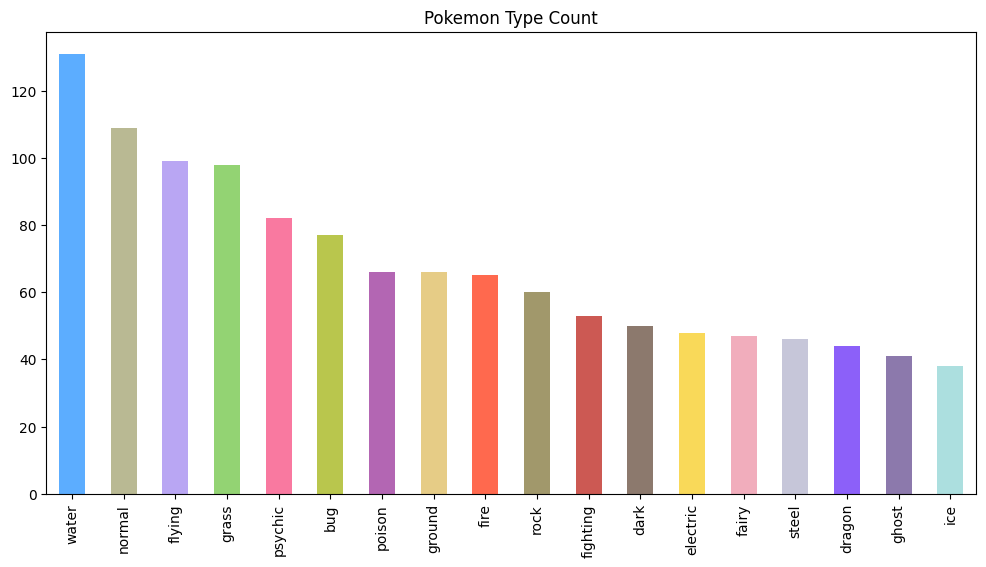

In [13]:
# histogram of each type1 and type2
type1_counts = df['type1'].value_counts()
type2_counts = df['type2'].value_counts()
type_counts = type1_counts.add(type2_counts, fill_value=0).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar', color=[type_color_dict[t] for t in type_counts.index], alpha=0.8)
plt.title('Pokemon Type Count')
plt.show()

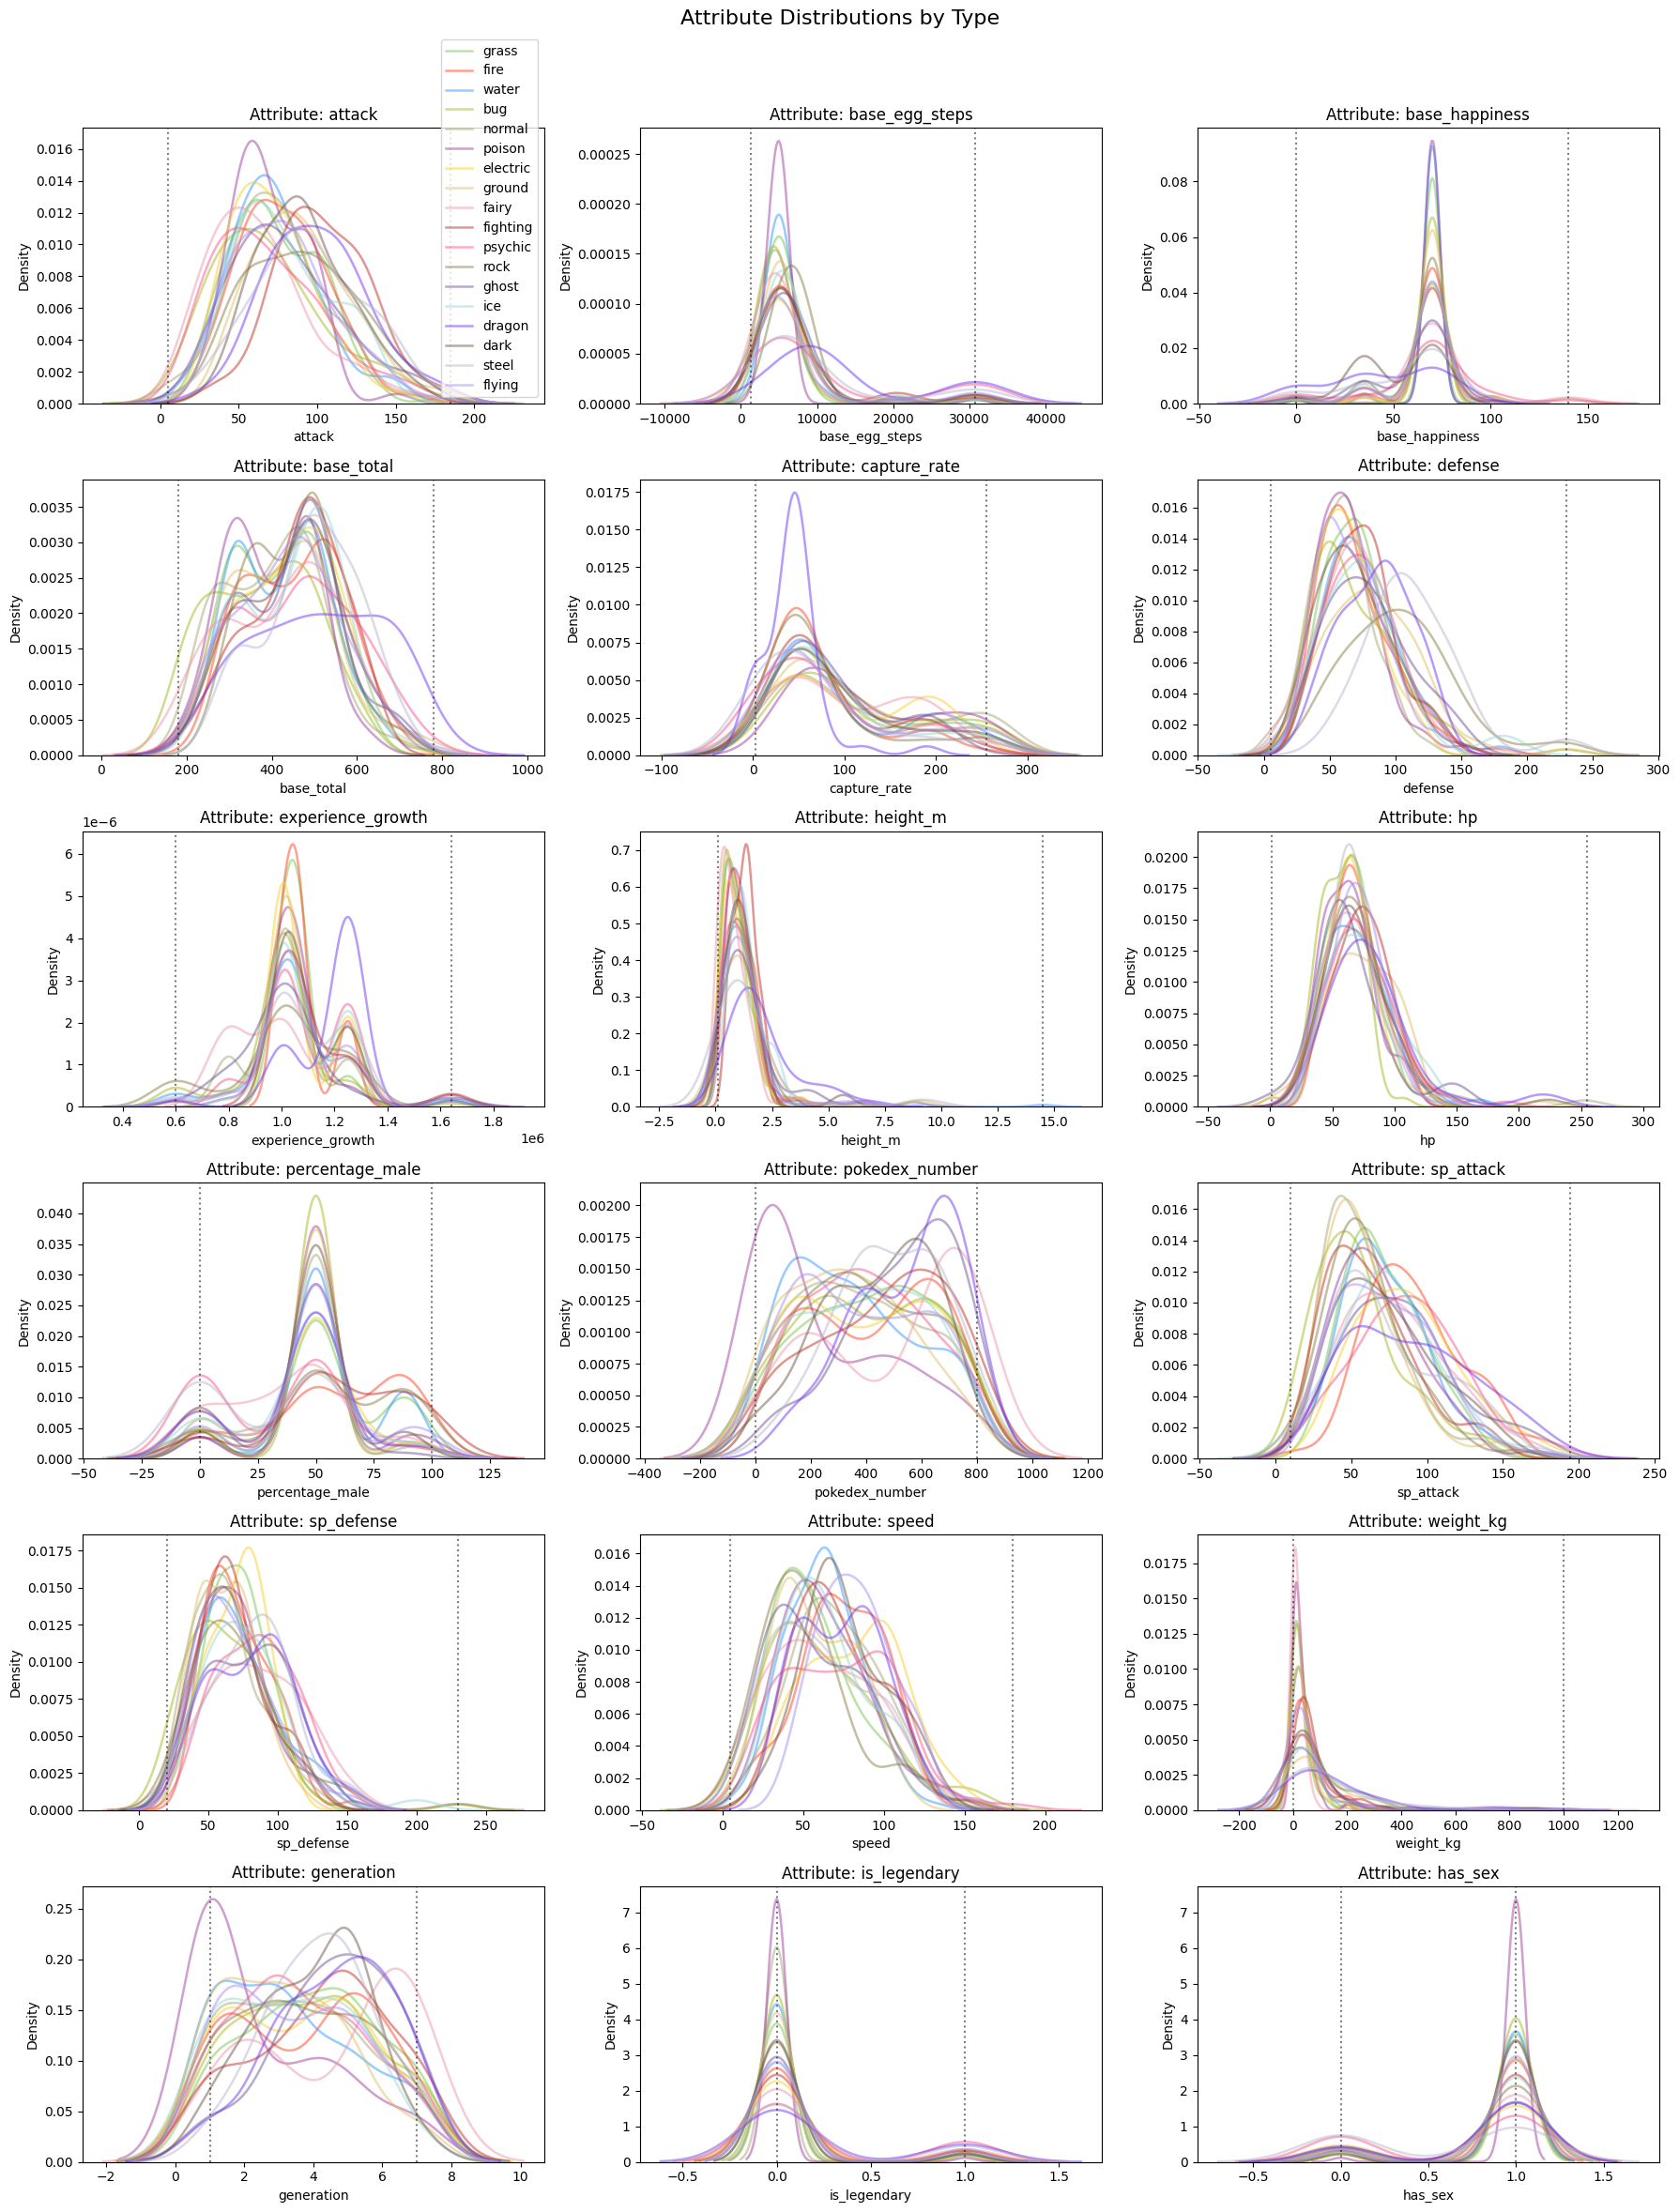

In [14]:
fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

attributes = [col for col in df if col not in ['type1', 'type2']]

for i, attr in enumerate(attributes):
    # Get min and max value for current attribute
    max_val = df[attr].max()
    min_val = df[attr].min()
    
    # Plot KDE for each type1
    for t in df['type1'].unique():
        # donem igual importancia al tipus 1 que al 2
        subset1 = df[df['type1'] == t][attr]
        subset2 = df[df['type2'] == t][attr]
        subset = pd.concat([subset1, subset2])
        sns.kdeplot(subset, ax=axes[i], label=t, color=type_color_dict[t], fill=False, alpha=0.5, linewidth=1.8)
    
    # Plot min and max values
    axes[i].axvline(min_val, color='black', linestyle=':', alpha=0.5, linewidth=1.5)
    axes[i].axvline(max_val, color='black', linestyle=':', alpha=0.5, linewidth=1.5)

    axes[i].set_title(f'Attribute: {attr}')
    if i == 0:
        axes[i].legend()

fig.suptitle('Attribute Distributions by Type', fontsize=16)
plt.tight_layout()
plt.show()

- Auc-roc mitjà
- Accuracy
- Classification report de scikitlearn
- Matriu de confusió

In [15]:
# make one-hot array for types
types = df['type1'].unique().tolist()
for t in types:
    df[f"is_{t}"] = 0
    df.loc[(df['type1'] == t) | (df['type2'] == t), f"is_{t}"] = 1

df = df.drop(columns=["type1", "type2"])
df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,...,is_fairy,is_fighting,is_psychic,is_rock,is_ghost,is_ice,is_dragon,is_dark,is_steel,is_flying
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,...,0,0,0,0,0,0,0,0,0,0
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,...,0,0,0,0,0,0,0,0,0,0
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,...,0,0,0,0,0,0,0,0,0,0
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,...,0,0,0,0,0,0,0,0,0,0
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,181,30720,0,570,255,131,1250000,0.3,59,0.0,...,0,0,0,0,0,0,0,0,1,0
798,101,30720,0,570,15,53,1250000,5.5,223,0.0,...,0,0,0,0,0,0,1,1,0,0
799,107,30720,0,600,3,101,1250000,2.4,97,0.0,...,0,0,1,0,0,0,0,0,0,0
800,95,30720,0,600,3,115,1250000,1.0,80,0.0,...,1,0,0,0,0,0,0,0,1,0


In [16]:
def z_score_all_but_targets(df: pd.DataFrame) -> pd.DataFrame:
    # normalize all columns except target columns (the ones that start with "is_")
    df_new = df.copy()
    cols = df.columns.tolist()
    for col in cols:
        if not col.startswith("is_") and col != "has_sex":
            mean = df_new[col].mean()
            std = df_new[col].std()
            df_new[col] = (df_new[col] - mean) / std
    return df_new

In [17]:
df = z_score_all_but_targets(df)
df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,...,is_fairy,is_fighting,is_psychic,is_rock,is_ghost,is_ice,is_dragon,is_dark,is_steel,is_flying
0,-0.898503,-0.315833,0.236487,-0.927073,-0.705100,-0.780159,0.030333,-0.425766,-0.901598,1.514045,...,0,0,0,0,0,0,0,0,0,0
1,-0.494126,-0.315833,0.236487,-0.196938,-0.705100,-0.324924,0.030333,-0.149500,-0.336867,1.514045,...,0,0,0,0,0,0,0,0,0,0
2,0.687898,-0.315833,0.236487,1.649381,-0.705100,1.626081,0.030333,0.771385,0.416108,1.514045,...,0,0,0,0,0,0,0,0,0,0
3,-0.805185,-0.315833,0.236487,-1.002605,-0.705100,-0.975259,0.030333,-0.517854,-1.127491,1.514045,...,0,0,0,0,0,0,0,0,0,0
4,-0.431914,-0.315833,0.236487,-0.196938,-0.705100,-0.487508,0.030333,-0.057412,-0.412165,1.514045,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,3.207475,3.590069,-3.337240,1.187802,2.043557,1.886215,1.217552,-0.794120,-0.374516,-1.841380,...,0,0,0,0,0,0,0,0,1,0
798,0.719004,3.590069,-3.337240,1.187802,-1.097766,-0.650092,1.217552,3.994483,5.799880,-1.841380,...,0,0,0,0,0,0,1,1,0,0
799,0.905639,3.590069,-3.337240,1.439572,-1.254832,0.910712,1.217552,1.139739,1.056137,-1.841380,...,0,0,1,0,0,0,0,0,0,0
800,0.532368,3.590069,-3.337240,1.439572,-1.254832,1.365947,1.217552,-0.149500,0.416108,-1.841380,...,1,0,0,0,0,0,0,0,1,0


In [18]:
X = df.drop(columns=[f"is_{_type}" for _type in types])
# X = X.drop(columns=["has_sex"])
# Y is the binary type matrix
Y = df[[f"is_{_type}" for _type in types]]

In [19]:
# al general no posem stratify perque no es binari el target
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)

In [20]:
def split_Y(Y, target): 
    return Y[f"is_{target}"]

Pel `parameter_grid` hem probat els seguents models: Logistic regresion, random forest, gradient boosting (tant el de sklearn com el de xgboost), SVM, KNN, ridge, gnb, bnb i mlp. Pero observant els resultats hem deixat a `parameter_grid` unicament SVM, ridge, gnb i bnb.

In [21]:
# new parameter grids for the rest of types
parameter_grids = {
    'SVM': (
        SVC(probability=True), {
            'C': [0.1, 0.5, 1, 5, 10],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],    
            'gamma': ['scale', 0.001, 0.01, 0.1], 
            'class_weight': ['balanced'] 
        }
    ),
    'RIDGE': (
        RidgeClassifier(), {
            'alpha': [0.5, 1.0, 2.0, 5.0],
            'class_weight': ['balanced']
        }
    ),
    'GNB': (GaussianNB(), {}),
    'BNB': (
        BernoulliNB(), {
            'alpha': [0.5, 1.0, 2.0]
        }
    ), 
    'KNN': (
        KNeighborsClassifier(), {
            'n_neighbors': [5, 7, 10, 12, 15, 20],  
            'weights': ['uniform'],           
            'metric': ['minkowski', 'euclidean', 'manhattan'],
            'p': [1, 2],                                  
            'leaf_size': [10, 20, 30, 40, 50],            
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    ),
    'GB-skit': (
        GradientBoostingClassifier(), {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [2, 3, 4],
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [2, 3, 5],
            'subsample': [0.5, 0.7, 0.8],
            'max_features': ['sqrt', 'log2'] 
        }
    ),
    'GB-xgb': (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic', tree_method='hist', n_jobs=-1), {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [2, 3, 4],
            'subsample': [0.6, 0.8],
            'colsample_bytree': [0.6, 0.8],
            'min_child_weight': [3, 5],
            'gamma': [0, 0.1, 0.3]
        }
    ),
    'MLP': (
        MLPClassifier(max_iter=500), {
            'hidden_layer_sizes': [(10,), (20,), (30,)],
            'alpha': [0.001, 0.01, 0.1],
            'learning_rate_init': [0.001, 0.01],
        }
    )
}

In [22]:
# n_iteracions per RandomizedSearchCV per cada model per garantitzar que obtenim un model decent
n_iter_by_model = {
    'SVM': 40,
    'RIDGE': 20,
    'GNB': 1,
    'BNB': 3,
    'KNN': 270, 
    'GB-skit': 430,
    'GB-xgb': 108,
    'MLP': 10,
}

Aqui guardarem els resultats dels millors models per cada tipus.

In [23]:
tolerancia = 0.15  
 
model_by_type = {}
threshold_by_type = {}
train_scores = {}
test_scores = {}
types_wout_model = []

In [24]:
def best_threshold(model, X_val, y_val):
    probas = model.predict_proba(X_val)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_val, probas)
    if len(thresholds) == 0:
        return 0.5
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
    idx = np.argmax(f1_scores)
    return thresholds[idx]

Codi principal per trobar el millor model per cada tipus. 

Es basa en RandomizedSearch per trobar els millors paràmetres per cada model i a partir d'aquests es tria el que te millor valor mitjà de f1-score a test sempre que la diferència entre els scores de train i test no superi la tolarància definida per `tol = 0.2*f1_train` que depen del score a train de manera que si aquest valor augmenta, la tolerància pot variar més. Si la diferència supera la tolerància, aleshores la comparem amb la que hem definit com `tolerancia` que és un valor llindar amb el que trobem encara acceptable que sobrepassi la tolerància. Si tot i això encara queda algun model sense cumplir cap de les dues condicions, triem el que tingui menor diferència entre scores i el marquem com a millorable.

Seguidament, com que la majoria de models que utilitzem son probabilistics i les nostres dades son molt desbalensejades, amb les dades de validació trobem un millor threshold per cada tipus.

In [25]:
val_ap_by_model_and_type = {}       # {model_name: {type: val_ap}}
train_ap_by_model_and_type = {}     # {model_name: {type: train_ap}}

for i, t in enumerate(types):
    print(f"\n=== ({i+1}) TYPE: {t} ===")
    y_full = split_Y(Y_train_full, target=t)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_full, test_size=0.2, random_state=1, stratify=y_full
    )

    for model_name, (model, param_grid) in parameter_grids.items():
        grid_search = RandomizedSearchCV(
            model, param_grid, cv=5, n_iter=n_iter_by_model[model_name], scoring='average_precision', n_jobs=-1, refit=True
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        ap_train = grid_search.best_score_

        # Calcula average precision amb probabilitats
        if hasattr(best_model, "predict_proba"):
            pred_val = best_model.predict_proba(X_val)[:, 1]
            pred_train = best_model.predict_proba(X_train)[:, 1]
        else:
            pred_val = best_model.decision_function(X_val)
            pred_train = best_model.decision_function(X_train)

        ap_val_val = average_precision_score(y_val, pred_val)
        ap_val_train_full = average_precision_score(y_train, pred_train)

        print(f"Model: {model_name} | AP train CV: {ap_train:.4f} | AP train: {ap_val_train_full:.4f} | AP val validation: {ap_val_val:.4f}")

        # Guardar informació
        val_ap_by_model_and_type.setdefault(model_name, {})[t] = ap_val_val
        train_ap_by_model_and_type.setdefault(model_name, {})[t] = ap_val_train_full

# === Selecció global del model ===
print("\n=== Resum global dels models ===")
for model_name in val_ap_by_model_and_type:
    val_aps = list(val_ap_by_model_and_type[model_name].values())
    train_aps = list(train_ap_by_model_and_type[model_name].values())

    mean_val = np.mean(val_aps)
    var_val = np.var(val_aps)
    mean_train = np.mean(train_aps)
    var_train = np.var(train_aps)

    print(f"Model: {model_name}")
    print(f"\t Train AP: mean={mean_train:.4f}, var={var_train:.6f}")
    print(f"\t Val AP: mean={mean_val:.4f}, var={var_val:.6f}")


=== (1) TYPE: grass ===
Model: SVM | AP train CV: 0.3794 | AP train: 0.8317 | AP val validation: 0.3463
Model: RIDGE | AP train CV: 0.2182 | AP train: 0.2395 | AP val validation: 0.2175
Model: GNB | AP train CV: 0.2332 | AP train: 0.2587 | AP val validation: 0.1621
Model: BNB | AP train CV: 0.2467 | AP train: 0.2388 | AP val validation: 0.1642
Model: KNN | AP train CV: 0.2038 | AP train: 0.2753 | AP val validation: 0.1442
Model: GB-skit | AP train CV: 0.3426 | AP train: 1.0000 | AP val validation: 0.2647
Model: GB-xgb | AP train CV: 0.3556 | AP train: 0.8264 | AP val validation: 0.3101
Model: MLP | AP train CV: 0.4017 | AP train: 1.0000 | AP val validation: 0.2043

=== (2) TYPE: fire ===
Model: SVM | AP train CV: 0.2700 | AP train: 0.5309 | AP val validation: 0.3481
Model: RIDGE | AP train CV: 0.2387 | AP train: 0.2634 | AP val validation: 0.2097
Model: GNB | AP train CV: 0.1802 | AP train: 0.1982 | AP val validation: 0.3147
Model: BNB | AP train CV: 0.1366 | AP train: 0.1463 | AP val

In [28]:
new_params = {
    'RIDGE': (
        RidgeClassifier(), {
            'alpha': [0.5, 1.0, 2.0, 5.0],
            'class_weight': ['balanced']
        }
    )
}

In [30]:
model_by_type = {}
for i, t in enumerate(types):
    print(f"\n=== ({i+1}) TYPE: {t} ===")
    y_full = split_Y(Y_train_full, target=t)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_full, test_size=0.2, random_state=1, stratify=y_full
    )

    for model_name, (model, param_grid) in new_params.items():

        grid_search = GridSearchCV(
            model, param_grid, cv=5, scoring='recall', n_jobs=-1, refit=True
        )

        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        ap_train = grid_search.best_score_

        # Guarda els millors parametres
        model_by_type[t] = RidgeClassifier(**grid_search.best_params_)
        model_by_type[t].fit(X_train_full, y_full)
        print(f"{t}: {grid_search.best_params_}")


=== (1) TYPE: grass ===
grass: {'alpha': 1.0, 'class_weight': 'balanced'}

=== (2) TYPE: fire ===
fire: {'alpha': 1.0, 'class_weight': 'balanced'}

=== (3) TYPE: water ===
water: {'alpha': 2.0, 'class_weight': 'balanced'}

=== (4) TYPE: bug ===
bug: {'alpha': 0.5, 'class_weight': 'balanced'}

=== (5) TYPE: normal ===
normal: {'alpha': 0.5, 'class_weight': 'balanced'}

=== (6) TYPE: poison ===
poison: {'alpha': 0.5, 'class_weight': 'balanced'}

=== (7) TYPE: electric ===
electric: {'alpha': 0.5, 'class_weight': 'balanced'}

=== (8) TYPE: ground ===
ground: {'alpha': 0.5, 'class_weight': 'balanced'}

=== (9) TYPE: fairy ===
fairy: {'alpha': 0.5, 'class_weight': 'balanced'}

=== (10) TYPE: fighting ===
fighting: {'alpha': 5.0, 'class_weight': 'balanced'}

=== (11) TYPE: psychic ===
psychic: {'alpha': 0.5, 'class_weight': 'balanced'}

=== (12) TYPE: rock ===
rock: {'alpha': 0.5, 'class_weight': 'balanced'}

=== (13) TYPE: ghost ===
ghost: {'alpha': 2.0, 'class_weight': 'balanced'}

=== (1

Analitzem les matrius de confusió

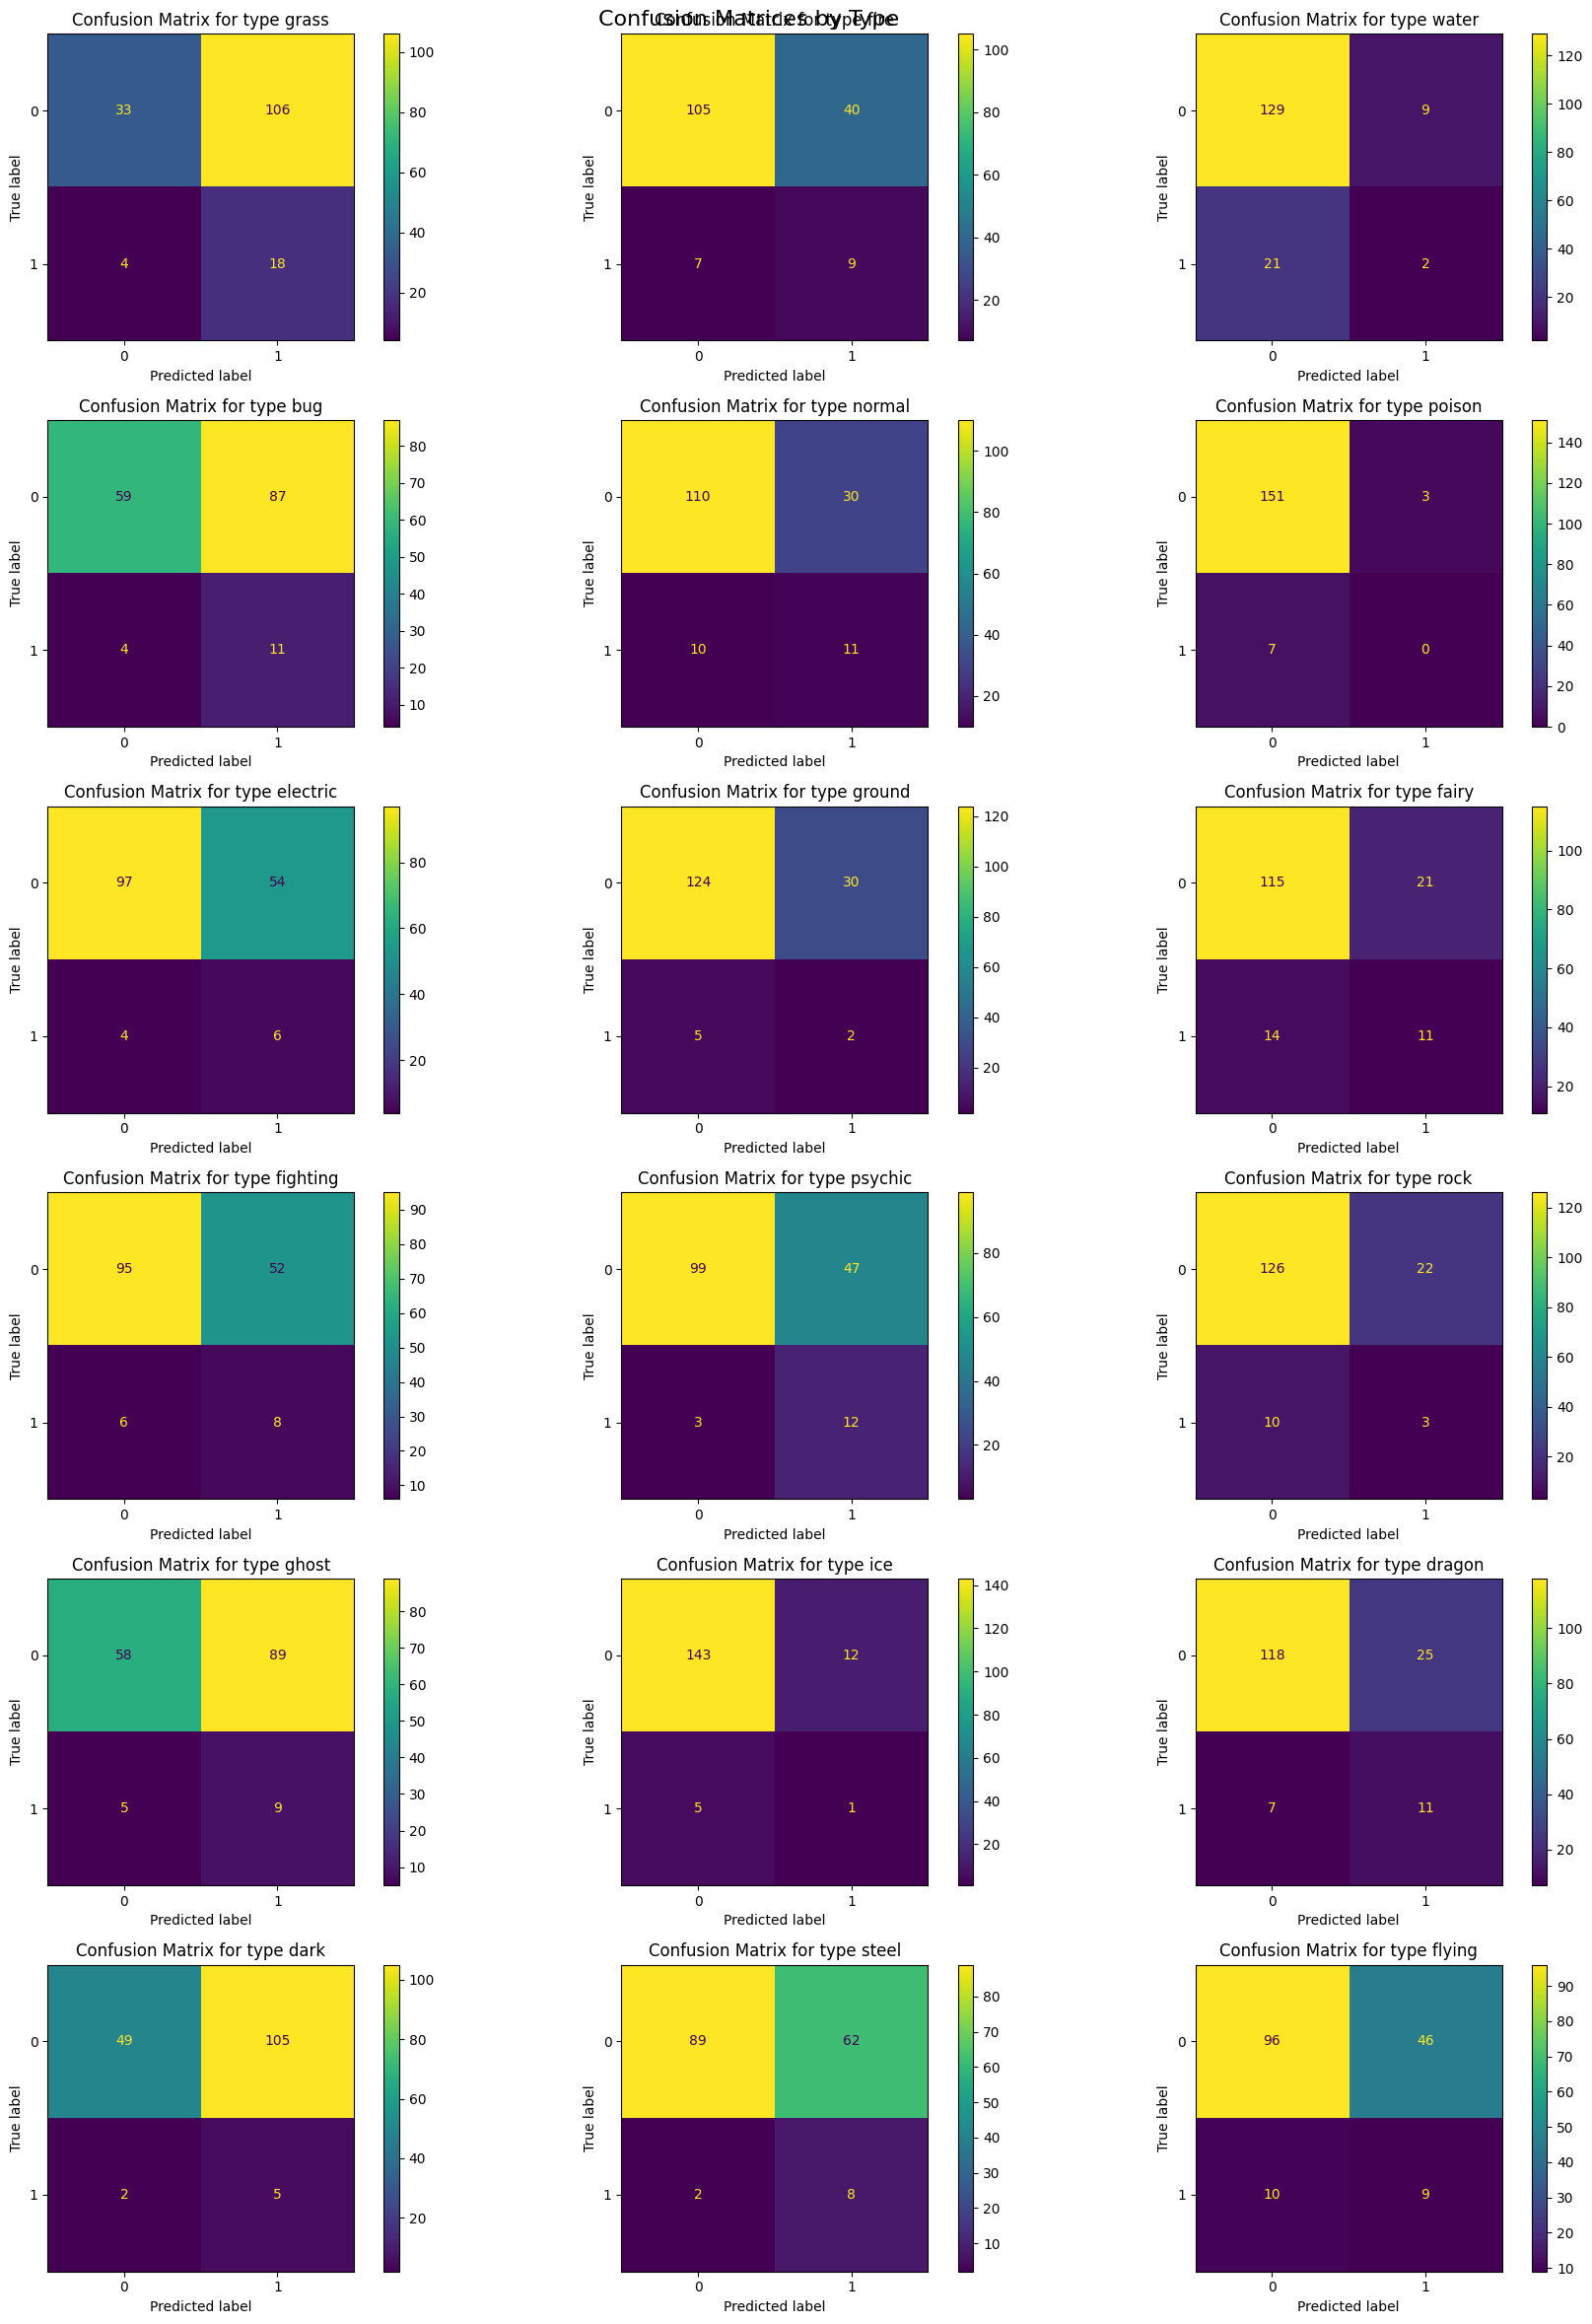

In [31]:
y_test_dict = {}
results_by_type = {}

fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

for t in types:
    y_test_dict[t] = split_Y(Y_test, target=t)

for t, model in model_by_type.items():
    y_true = y_test_dict[t]

    # obtenim prediccions
    # if t in threshold_by_type:
    #     probs = model.predict_proba(X_test)[:, 1]
    #     threshold = threshold_by_type[t]
    #     y_pred = (probs >= threshold).astype(int)
    # else:
    if hasattr(model, "decision_function"):
        decision_scores = model.decision_function(X_test)
        y_pred = (decision_scores >= 0).astype(int)
    else:
        y_pred = model.predict(X_test)
    
    # metriques
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    ap = average_precision_score(y_true, y_pred)

    results_by_type[t] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "ap": ap

    }

    cm = confusion_matrix(y_true, y_pred)
    
    # Use the integer index for axes. Ensure we place the matrix in the same position
    # as the `types` list (find index of the current type).
    idx = types.index(t)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix for type {t}')

fig.suptitle('Confusion Matrices by Type', fontsize=16)
plt.tight_layout()
plt.show()

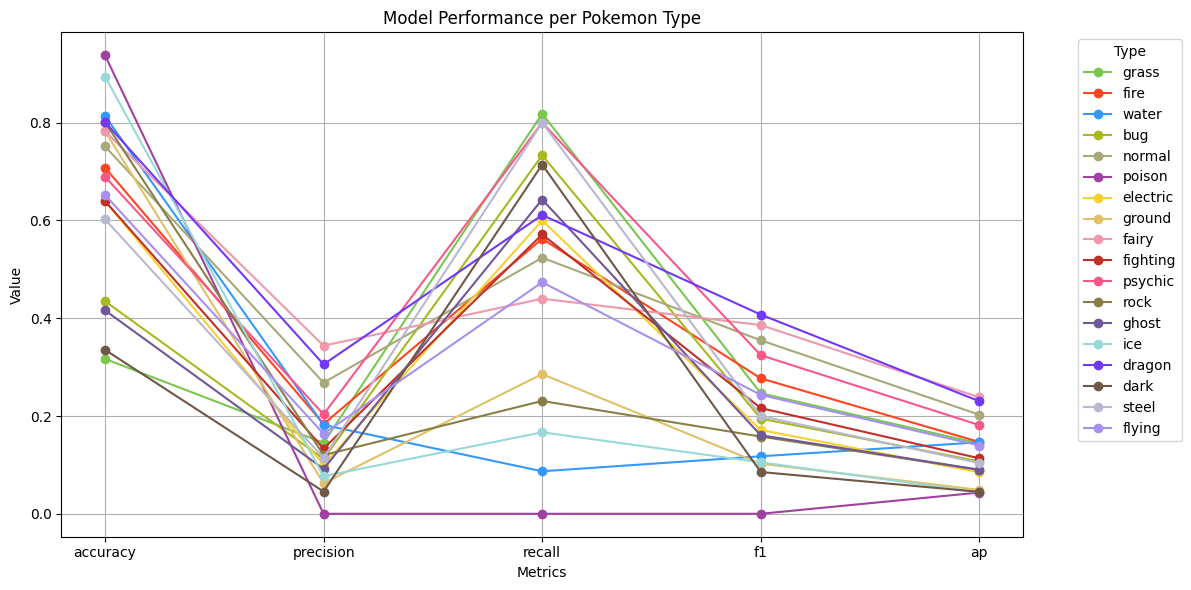

In [32]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'ap']

plt.figure(figsize=(12, 6))

for t in results_by_type.keys():
    scores = [results_by_type[t][metric] for metric in metrics]
    plt.plot(metrics, scores, marker='o', label=t, color=type_color_dict[t])

plt.xlabel("Metrics")
plt.ylabel("Value")
plt.title("Model Performance per Pokemon Type")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
class TypeOVA():
    def __init__(self, model_by_type: dict, threshold_by_type: dict):
        self.models = model_by_type
        self.thresholds = threshold_by_type
        self.types = list(model_by_type.keys())
    
    def fit(self, X, Y):
        for t in self.types:
            self.models[t].fit(X, split_Y(Y, target=t))
    
    def predict(self, stats):
        results = {}
        for t in self.types:
            if type(self.models[t]) is not RidgeClassifier:
                proba = self.models[t].predict_proba([stats])[:, 1]
                results[t] = (proba > self.thresholds[t]).astype(int)
            else:
                results[t] = self.models[t].predict([stats])
        self.last_prediction = results # ???
        return results
    
    def get_accuracy(self, X, Y):
        acc1 = 0
        acc2 = 0

        for stats, _type in zip(X.values, Y.values):
            probs = [float(e) for e in self.predict(stats).values()]
            best_probs_idx = list(np.array(probs).argsort()[-2:][::-1])
            if probs[best_probs_idx[1]] < 0.5:
                best_probs_idx = [best_probs_idx[0]]
            
            real_idx = list(np.array(_type.tolist()).argsort()[-2:][::-1])

            for i in best_probs_idx:
                if i in real_idx:
                    acc1 += 1
                    break
            
            if set(best_probs_idx) == set(real_idx):
                acc2 += 1
        
        return acc1 / len(X), acc2 / len(X)

In [34]:
ova = TypeOVA(model_by_type, threshold_by_type)
ova.fit(X_train_full, Y_train_full)
acc1_train, acc2_train = ova.get_accuracy(X_train_full, Y_train_full)
acc1_test, acc2_test = ova.get_accuracy(X_test, Y_test)

print(f"Train Accuracy Top-1: {acc1_train:.4f}, Top-2: {acc2_train:.4f}")
print(f"Test Accuracy Top-1: {acc1_test:.4f}, Top-2: {acc2_test:.4f}")

Train Accuracy Top-1: 0.6069, Top-2: 0.0530
Test Accuracy Top-1: 0.3416, Top-2: 0.0062
